In [105]:
import warnings
warnings.filterwarnings('ignore')

# Pré-processamento de dados
## abertura da base de dados

In [106]:
import pandas as pd
dados = pd.read_csv('projeto_aula_4.csv')
dados.columns = [x.lower() for x in dados.columns]

In [107]:
dados

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,no,2,1
...,...,...,...,...,...,...,...,...,...
5893,Bachelors,2012,Hyderabad,3,32,Female,no,2,1
5894,High School,2017,Bangalore,3,29,Male,No,2,0
5895,High School,2013,New Delhi,3,25,Female,No,5,1
5896,High School,2011,Ahmedabad,3,29,Male,No,5,0


## Verificando os atributos do dataframe

In [108]:
dados.education.value_counts()

Bachelors      3729
Masters        1000
High School     851
PHD             318
Name: education, dtype: int64

In [109]:
dados.joiningyear.value_counts()

2017             1230
2015              886
2014              832
2013              751
2016              639
2012              607
2018              482
2011              125
2019              124
2010              120
Not available     102
Name: joiningyear, dtype: int64

In [110]:
dados.city.value_counts()

Bangalore    2406
Pune         1444
New Delhi    1325
Chennai       186
Ahmedabad     182
Hyderabad     182
Mumbai        173
Name: city, dtype: int64

In [111]:
dados.paymenttier.value_counts()

3    4424
2    1175
1     299
Name: paymenttier, dtype: int64

In [112]:
dados.gender.value_counts()

Male      3350
Female    2261
male       168
female     119
Name: gender, dtype: int64

In [113]:
dados.everbenched.value_counts()

No     5038
Yes     586
no      150
yes     124
Name: everbenched, dtype: int64

In [114]:
dados.experienceincurrentdomain.value_counts()

2                1322
4                1164
5                1129
3                 958
1                 691
0                 435
Not available     179
7                  11
6                   9
Name: experienceincurrentdomain, dtype: int64

In [115]:
dados.leaveornot.value_counts()

0    3855
1    2043
Name: leaveornot, dtype: int64

## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis
<li> everbenched - corrigir classes dados e encodar
<li> gender - corrigir classes e encodar dummy
<li> city - encodar dummy
<li> joiningyear - preencher valores não disponíveis e padronizar
<li> education - encodar ordinal


### tratando experienceincurrentdomain

In [116]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [191]:
coluna7 = dados[['experienceincurrentdomain']] #cópia somente da coluna de interesse
dados_numericos = coluna7[coluna7.experienceincurrentdomain!='Not available'] #filtrando pelos dados numéricos
dados_numericos.value_counts()

experienceincurrentdomain
2                            1322
4                            1164
5                            1129
3                             958
1                             691
0                             435
7                              11
6                               9
dtype: int64

In [192]:
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   experienceincurrentdomain  5719 non-null   object
dtypes: object(1)
memory usage: 89.4+ KB


Os dados da coluna 7 são do tipo objeto. Será necessário conversão antes de uma análise matemática:

In [193]:
dados_numericos['experienceincurrentdomain'] = dados_numericos['experienceincurrentdomain'].astype(int)
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   experienceincurrentdomain  5719 non-null   int32
dtypes: int32(1)
memory usage: 67.0 KB


In [194]:
dados_numericos.describe()

,experienceincurrentdomain
count,5719.000000
mean,2.909774
std,1.558661
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


(array([ 435.,  691., 1322.,    0.,  958., 1164.,    0., 1129.,    9.,
          11.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

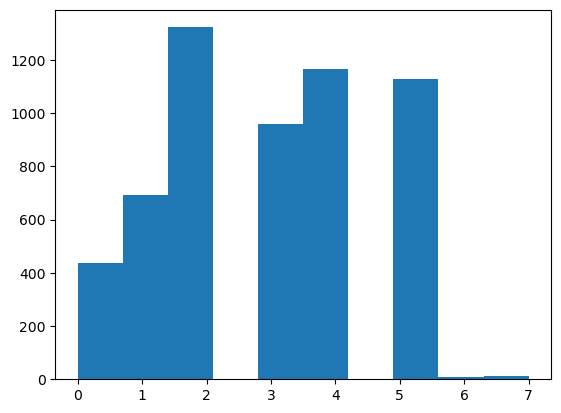

In [195]:
import matplotlib.pyplot as plt
plt.hist(dados_numericos.experienceincurrentdomain)

Definir uma função que gera aleatoriamente valores entre 2 e 5

In [196]:
import numpy as np
def valor_aleatorio():
    valor = np.random.randint(2,6)
    return str(valor)


In [197]:
valor_aleatorio()

'4'

Substituir em coluna7 valores "Not avaliable" por valores gerados pela função

In [201]:
coluna7['experienceincurrentdomain'] = [valor_aleatorio() if x == 'Not available' else x for x in coluna7['experienceincurrentdomain']]

In [202]:
coluna7.experienceincurrentdomain.value_counts()

2    1363
4    1216
5    1177
3     996
1     691
0     435
7      11
6       9
Name: experienceincurrentdomain, dtype: int64

In [203]:
dados.experienceincurrentdomain.value_counts()

2                1322
4                1164
5                1129
3                 958
1                 691
0                 435
Not available     179
7                  11
6                   9
Name: experienceincurrentdomain, dtype: int64

In [204]:
coluna7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   experienceincurrentdomain  5898 non-null   object
dtypes: object(1)
memory usage: 46.2+ KB


In [205]:
coluna7['experienceincurrentdomain'] = coluna7['experienceincurrentdomain'].astype(int)
coluna7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   experienceincurrentdomain  5898 non-null   int32
dtypes: int32(1)
memory usage: 23.2 KB


## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK
<li> everbenched - corrigir classes dados e encodar
<li> gender - corrigir classes e encodar dummy
<li> city - encodar dummy
<li> joiningyear - preencher valores não disponíveis e padronizar
<li> education - encodar ordinal

### tratando everbenched

In [206]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [207]:
coluna6 = dados[['everbenched']]
coluna6

,everbenched
0,No
1,No
2,No
3,No
4,no
...,...
5893,no
5894,No
5895,No
5896,No


In [208]:
coluna6.everbenched.value_counts()

No     5038
Yes     586
no      150
yes     124
Name: everbenched, dtype: int64

Capitalizando a primeira letra

In [209]:
coluna6['everbenched'] = [x.capitalize() for x in coluna6['everbenched']]
coluna6.everbenched.value_counts()

No     5188
Yes     710
Name: everbenched, dtype: int64

Encodando os dados (dados booleanos, logo Não -> 0 e Sim -> 1)

In [210]:
coluna6['everbenched'] = np.where(
    coluna6['everbenched'] == "No",
    0,
    1
)
coluna6.everbenched.value_counts()

0    5188
1     710
Name: everbenched, dtype: int64

## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK
<li> everbenched - corrigir classes dados e encodar - OK
<li> gender - corrigir classes e encodar dummy
<li> city - encodar dummy
<li> joiningyear - preencher valores não disponíveis e padronizar
<li> education - encodar ordinal

### tratando gender

In [211]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [212]:
coluna5 = dados[['gender']]
coluna5.value_counts()

gender
Male      3350
Female    2261
male       168
female     119
dtype: int64

In [213]:
coluna5['gender'] = [x.capitalize() for x in coluna5.gender]
coluna5.value_counts()

gender
Male      3518
Female    2380
dtype: int64

Dummy encoding

In [214]:
coluna5 = pd.get_dummies(coluna5,columns=['gender'])
coluna5

,gender_Female,gender_Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
5893,1,0
5894,0,1
5895,1,0
5896,0,1


## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK
<li> everbenched - corrigir classes dados e encodar - OK
<li> gender - corrigir classes e encodar dummy - OK
<li> city - encodar dummy
<li> joiningyear - preencher valores não disponíveis e padronizar
<li> education - encodar ordinal

### tratando city

In [215]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [216]:
coluna2 = dados[['city']]
coluna2.value_counts()

city     
Bangalore    2406
Pune         1444
New Delhi    1325
Chennai       186
Ahmedabad     182
Hyderabad     182
Mumbai        173
dtype: int64

In [217]:
coluna2 = pd.get_dummies(coluna2,columns=['city'])
coluna2

,city_Ahmedabad,city_Bangalore,city_Chennai,city_Hyderabad,city_Mumbai,city_New Delhi,city_Pune
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
5893,0,0,0,1,0,0,0
5894,0,1,0,0,0,0,0
5895,0,0,0,0,0,1,0
5896,1,0,0,0,0,0,0


## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK
<li> everbenched - corrigir classes dados e encodar - OK
<li> gender - corrigir classes e encodar dummy - OK
<li> city - encodar dummy - OK
<li> joiningyear - preencher valores não disponíveis e padronizar
<li> education - encodar ordinal

### tratando joiningyear

In [218]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [219]:
coluna1 = dados[['joiningyear']]
coluna1.value_counts()

joiningyear  
2017             1230
2015              886
2014              832
2013              751
2016              639
2012              607
2018              482
2011              125
2019              124
2010              120
Not available     102
dtype: int64

In [220]:
dados_numericos_ano = coluna1[coluna1.joiningyear!='Not available']
dados_numericos_ano['joiningyear'] = dados_numericos_ano['joiningyear'].astype(int)
dados_numericos_ano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   joiningyear  5796 non-null   int32
dtypes: int32(1)
memory usage: 67.9 KB


(array([ 120.,  125.,  607.,  751.,  832.,  886.,  639., 1230.,  482.,
         124.]),
 array([2010. , 2010.9, 2011.8, 2012.7, 2013.6, 2014.5, 2015.4, 2016.3,
        2017.2, 2018.1, 2019. ]),
 <BarContainer object of 10 artists>)

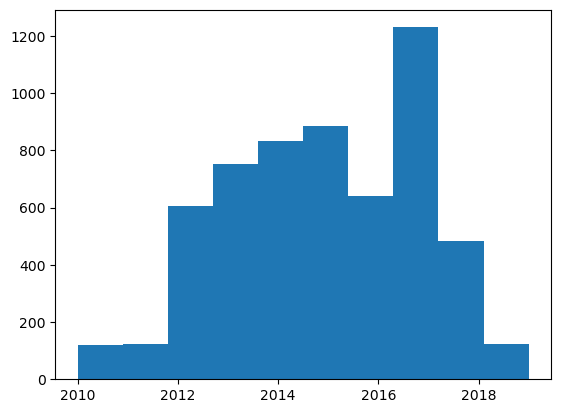

In [221]:
plt.hist(dados_numericos_ano['joiningyear'])

In [222]:
media_ano = dados_numericos_ano['joiningyear'].mean()
desvio_ano = dados_numericos_ano['joiningyear'].std()
media_ano,desvio_ano

(2014.9630779848171, 2.1251645092389593)

In [223]:
def ano_aleatorio():
    valor = np.random.normal(media_ano,desvio_ano)
    valor = int(valor)
    return str(valor)

In [224]:
ano_aleatorio()

'2013'

In [226]:
coluna1['joiningyear'] = [ano_aleatorio() if x == 'Not available' else x for x in coluna1['joiningyear']]
coluna1['joiningyear'] = coluna1['joiningyear'].astype(int)
coluna1.value_counts()

joiningyear
2017           1238
2015            904
2014            847
2013            770
2016            656
2012            617
2018            487
2011            129
2019            125
2010            123
2009              2
dtype: int64

In [228]:
dados.joiningyear.value_counts()

2017             1230
2015              886
2014              832
2013              751
2016              639
2012              607
2018              482
2011              125
2019              124
2010              120
Not available     102
Name: joiningyear, dtype: int64

Normalização: baseado no máximo e no mínimo: máximo igual a 1, mínimo igual a 0

In [229]:
coluna1_normalizada = coluna1.copy()
maximo = coluna1_normalizada['joiningyear'].max()
minimo = coluna1_normalizada['joiningyear'].min()
coluna1_normalizada['joiningyear'] = (coluna1_normalizada['joiningyear']-minimo)/(maximo-minimo)
coluna1_normalizada.value_counts()

joiningyear
0.8            1238
0.6             904
0.5             847
0.4             770
0.7             656
0.3             617
0.9             487
0.2             129
1.0             125
0.1             123
0.0               2
dtype: int64

padronização: baseado na média e no desvio padrao

In [230]:
coluna1_padronizada = coluna1.copy()
media = coluna1_padronizada['joiningyear'].mean()
desvio = coluna1_padronizada['joiningyear'].std()
coluna1_padronizada['joiningyear'] = (coluna1_padronizada['joiningyear']-media)/desvio
coluna1_padronizada['joiningyear'].value_counts()


 0.963445    1238
 0.022962     904
-0.447279     847
-0.917521     770
 0.493203     656
-1.387762     617
 1.433686     487
-1.858004     129
 1.903928     125
-2.328245     123
-2.798486       2
Name: joiningyear, dtype: int64

## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK
<li> everbenched - corrigir classes dados e encodar - OK
<li> gender - corrigir classes e encodar dummy - OK
<li> city - encodar dummy - OK
<li> joiningyear - preencher valores não disponíveis e padronizar - OK
<li> education - encodar ordinal

### tratando education

In [231]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [233]:
coluna0 = dados[['education']]
coluna0.value_counts()

education  
Bachelors      3729
Masters        1000
High School     851
PHD             318
dtype: int64

In [234]:
lista_educacao = coluna0.education.unique().tolist()
lista_educacao.sort()
lista_educacao

['Bachelors', 'High School', 'Masters', 'PHD']

In [237]:
lista_valores = [1,0,2,3]
lista_valores

[1, 0, 2, 3]

In [239]:
educacao = pd.DataFrame()
educacao['nome'] = lista_educacao
educacao['valores'] = lista_valores
educacao

,nome,valores
0,Bachelors,1
1,High School,0
2,Masters,2
3,PHD,3


In [240]:
dc = pd.Series(
    educacao.valores.values,
    index = educacao.nome
).to_dict()
dc

{'Bachelors': 1, 'High School': 0, 'Masters': 2, 'PHD': 3}

In [241]:
coluna0.head(5)

,education
0,Bachelors
1,Bachelors
2,Bachelors
3,Masters
4,Masters


In [242]:
coluna0['valor_educacao'] = coluna0.education.map(dc)
coluna0

,education,valor_educacao
0,Bachelors,1
1,Bachelors,1
2,Bachelors,1
3,Masters,2
4,Masters,2
...,...,...
5893,Bachelors,1
5894,High School,0
5895,High School,0
5896,High School,0


In [244]:
coluna0 = coluna0[['valor_educacao']]
coluna0

,valor_educacao
0,1
1,1
2,1
3,2
4,2
...,...
5893,1
5894,0
5895,0
5896,0


## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK - coluna7
<li> everbenched - corrigir classes dados e encodar - OK - coluna6
<li> gender - corrigir classes e encodar dummy - OK - coluna5
<li> city - encodar dummy - OK - coluna2
<li> joiningyear - preencher valores não disponíveis e padronizar - OK - coluna1
<li> education - encodar ordinal - OK - coluna0

### remontando o dataframe

Foi esquecido de tratar a coluna "age"

In [251]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


In [260]:
coluna4 = dados[['age']]
coluna4.value_counts()

age          
26               675
28               660
27               655
25               457
24               438
29               269
30               246
36               185
37               179
39               179
32               176
34               176
33               173
38               173
40               168
35               168
31               158
Not available    126
41               113
23               106
22                99
45                53
21                52
20                47
43                44
48                43
46                41
49                39
dtype: int64

(array([ 198., 1001., 1990.,  673.,  525.,  532.,  520.,  157.,   94.,
          82.]),
 array([20. , 22.9, 25.8, 28.7, 31.6, 34.5, 37.4, 40.3, 43.2, 46.1, 49. ]),
 <BarContainer object of 10 artists>)

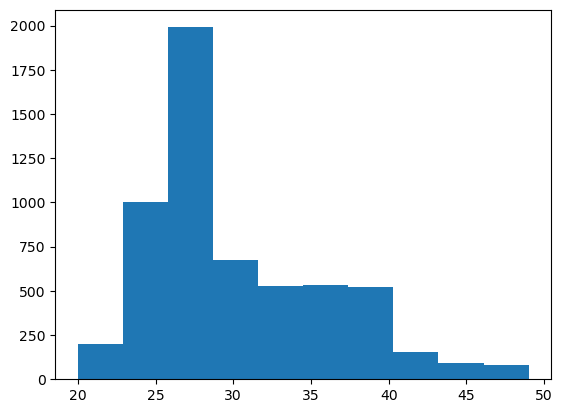

In [261]:
dados_numericos_age = coluna4[coluna4.age!='Not available']
dados_numericos_age['age'] = dados_numericos_age['age'].astype(int)
plt.hist(dados_numericos_age['age'])

In [262]:
def idade_aleatoria():
    valor = np.random.normal(dados_numericos_age['age'].mean(),dados_numericos_age['age'].std())
    valor = int(valor)
    return str(valor)

In [263]:
idade_aleatoria()

'24'

In [264]:
coluna4['age'] = [idade_aleatoria() if x == 'Not available' else x for x in coluna4['age']]
coluna4['age'] = coluna4['age'].astype(int)
coluna4.value_counts()

age
26     685
28     668
27     666
25     463
24     443
29     277
30     255
36     190
32     183
34     182
37     182
39     181
38     178
33     177
35     175
40     171
31     170
41     113
23     110
22     102
45      54
21      53
20      51
43      44
48      43
46      41
49      39
19       1
18       1
dtype: int64

In [265]:
age_max = coluna4['age'].max()
age_min = coluna4['age'].min()
coluna4['age'] = (coluna4['age']-age_min)/(age_max-age_min)
coluna4.value_counts()

age     
0.258065    685
0.322581    668
0.290323    666
0.225806    463
0.193548    443
0.354839    277
0.387097    255
0.580645    190
0.451613    183
0.516129    182
0.612903    182
0.677419    181
0.645161    178
0.483871    177
0.548387    175
0.709677    171
0.419355    170
0.741935    113
0.161290    110
0.129032    102
0.870968     54
0.096774     53
0.064516     51
0.806452     44
0.967742     43
0.903226     41
1.000000     39
0.032258      1
0.000000      1
dtype: int64

## Anotações sobre o que fazer em cada coluna:

<li> experienceincurrentdomain - preencher valores não disponíveis - OK - coluna7
<li> everbenched - corrigir classes dados e encodar - OK - coluna6
<li> gender - corrigir classes e encodar dummy - OK - coluna5
<li> age - preencher valores não disponíveis  e padronizar - OK - coluna 4
<li> city - encodar dummy - OK - coluna2
<li> joiningyear - preencher valores não disponíveis e padronizar - OK - coluna1
<li> education - encodar ordinal - OK - coluna0

### remontando o dataframe

colunas não alteradas: 8 e 3

In [279]:
dados.columns

Index(['education', 'joiningyear', 'city', 'paymenttier', 'age', 'gender',
       'everbenched', 'experienceincurrentdomain', 'leaveornot'],
      dtype='object')

In [302]:
novo_dataframe = pd.concat([
    coluna0,
    coluna1_normalizada,
    coluna2,
    dados[['paymenttier']],
    coluna4,
    coluna5,
    coluna6,
    coluna7,
    dados[['leaveornot']]
],axis=1)

In [303]:
novo_dataframe

,valor_educacao,joiningyear,city_Ahmedabad,city_Bangalore,city_Chennai,city_Hyderabad,city_Mumbai,city_New Delhi,city_Pune,paymenttier,age,gender_Female,gender_Male,everbenched,experienceincurrentdomain,leaveornot
0,1,0.8,0,1,0,0,0,0,0,3,0.516129,0,1,0,0,0
1,1,0.4,0,0,0,0,0,0,1,1,0.322581,1,0,0,3,1
2,1,0.5,0,0,0,0,0,1,0,3,0.645161,1,0,0,2,0
3,2,0.7,0,1,0,0,0,0,0,3,0.290323,0,1,0,5,1
4,2,0.8,0,0,0,0,0,0,1,3,0.193548,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,1,0.3,0,0,0,1,0,0,0,3,0.451613,1,0,0,2,1
5894,0,0.8,0,1,0,0,0,0,0,3,0.354839,0,1,0,2,0
5895,0,0.4,0,0,0,0,0,1,0,3,0.225806,1,0,0,5,1
5896,0,0.2,1,0,0,0,0,0,0,3,0.354839,0,1,0,5,0
